In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import linregress

# File to Load
housing_data_to_load = "Housing prices for US.csv"
index_data_to_load = "SPX_Prices_30yr_CombinedSectors_ModifDates3.csv"

# Read the files
housing_data = pd.read_csv(housing_data_to_load)
index_data = pd.read_csv(index_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(index_data, housing_data, on="DATE")

mspus_change = combined_data["MSPUS"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["RE Change"] = mspus_change - mspus_change.mean()

spx_change = combined_data["All"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["SPX Change"] = spx_change - spx_change.mean()

#index breakout
condisc_change = combined_data["Consumer Discretionary"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Consumer Discretionary Change"] = condisc_change - spx_change

constpl_change = combined_data["Consumer Staples"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Consumer Staples Change"] = condisc_change - spx_change

engy_change = combined_data["Energy"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Energy Change"] = engy_change - spx_change

fin_change = combined_data["Financials"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Financials Change"] = fin_change - spx_change

hcare_change = combined_data["Health Care"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Health Care Change"] = hcare_change - spx_change

indu_change = combined_data["Industrials"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Industrials Change"] = indu_change - spx_change

infotech_change = combined_data["Information Technology"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Information Technology Change"] = infotech_change - spx_change

mat_change = combined_data["Materials"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Materials Change"] = mat_change - spx_change

comm_change = combined_data["Communication Services"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Communication Services Change"] = comm_change - spx_change

util_change = combined_data["Utilities"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Utilities Change"] = util_change - spx_change

window = combined_data.iloc[85:175]
window.head()

,DATE,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,...,Consumer Discretionary Change,Consumer Staples Change,Energy Change,Financials Change,Health Care Change,Industrials Change,Information Technology Change,Materials Change,Communication Services Change,Utilities Change
85,1/1/2011,295.5370,303.58,506.75,214.77,364.78,301.12,404.55,239.61,120.58,...,0.019431,0.019431,0.106615,0.009728,-0.070853,0.009849,-0.002294,0.082923,-0.042793,-0.102221
86,4/1/2011,308.3963,308.85,589.31,220.71,383.00,325.80,417.63,249.36,131.23,...,-0.010709,-0.010709,0.108700,-0.026563,-0.004273,0.027740,-0.021888,-0.013529,-0.019189,-0.038029
87,7/1/2011,317.8900,322.66,559.46,206.87,410.93,321.86,410.91,245.93,134.06,...,0.034699,0.034699,-0.046738,-0.058792,0.076839,-0.008179,-0.012176,-0.009841,0.012095,0.054001
88,10/1/2011,275.5344,306.71,442.79,159.05,367.73,252.62,378.19,184.55,113.25,...,0.010039,0.010039,-0.065261,-0.087881,0.038152,-0.071846,0.063651,-0.106304,0.051497,0.147631
89,1/1/2012,308.5797,335.54,520.81,175.23,401.90,292.32,409.93,211.71,130.15,...,0.008399,0.008399,0.064668,-0.009803,-0.018611,0.045621,-0.027606,0.035636,-0.047521,-0.040033
90,4/1/2012,356.5460,351.49,538.43,212.84,435.76,323.52,496.57,234.14,142.09,...,0.035484,0.035484,-0.086126,0.094675,-0.035708,-0.013225,0.091395,-0.014011,-0.113564,-0.146791
91,7/1/2012,345.8088,358.92,503.27,197.37,440.76,310.06,462.02,222.94,146.68,...,0.002765,0.002765,-0.032421,-0.039804,0.044354,-0.008725,-0.036698,-0.014955,0.159095,0.087521
92,10/1/2012,370.2602,369.97,551.19,210.07,465.29,319.31,494.54,232.88,147.21,...,0.013071,0.013071,0.037581,0.006710,-0.001983,-0.027803,0.012750,-0.013050,0.010258,-0.073132
93,1/1/2013,376.0574,360.78,532.96,221.24,462.95,328.75,463.82,237.62,151.26,...,0.025708,0.025708,-0.023023,0.063224,0.005022,0.039615,-0.052067,0.030405,-0.060528,-0.029053
94,4/1/2013,420.2655,410.47,583.98,245.41,533.42,361.89,483.34,247.52,159.29,...,0.017290,0.017290,-0.004538,0.008981,0.051952,0.000539,-0.058182,-0.058604,-0.018303,0.018105


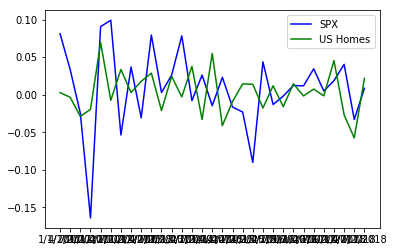

0.13035836196199466

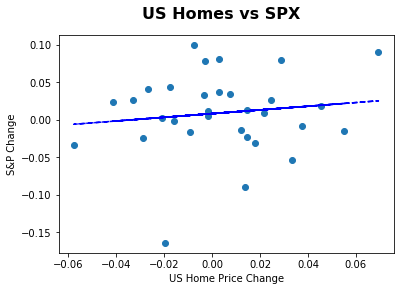

In [23]:
spx = window["SPX Change"]
re_prices = window["RE Change"]

#05-Matplotlib/Classwork/2/Activities/07-Ins_PandasMultiLine/Solved/unemploy_chart.ipynb
#Collect the years where data was collected
dates = window["DATE"]

#Plot the world average as a line chart
spx, = plt.plot(dates, spx, color="blue", label="SPX" )

#Plot the unemployment values for a single country
realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

#Create a legend for our chart
plt.legend(handles=[spx, realestate], loc="best")

#Show the chart
plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["SPX Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs SPX", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("S&P Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["SPX Change"].corr(window["RE Change"])

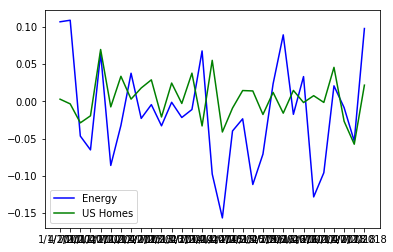

0.1838062546563848

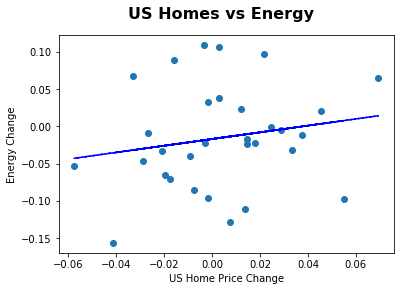

In [24]:
energy = window["Energy Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

energy, = plt.plot(dates, energy, color="blue", label="Energy" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[energy, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Energy Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Energy", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Energy Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Energy Change"].corr(window["RE Change"])

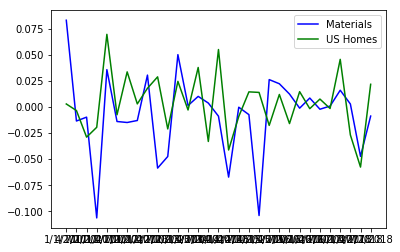

0.3038136390877769

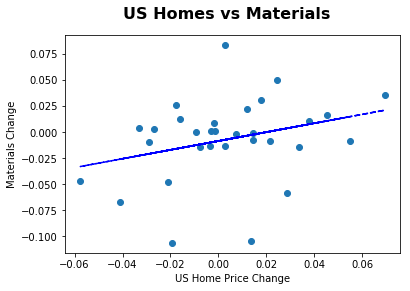

In [25]:
materials = window["Materials Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

materials, = plt.plot(dates, materials, color="blue", label="Materials" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[materials, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Materials Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Materials", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Materials Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Materials Change"].corr(window["RE Change"])

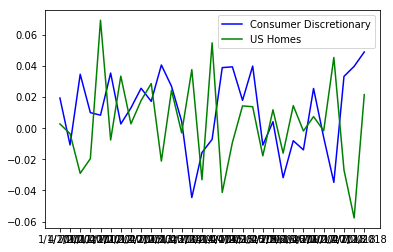

-0.31761162406396487

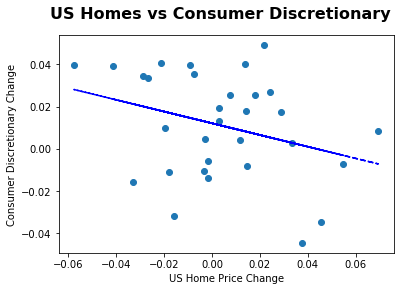

In [26]:
consdisc = window["Consumer Discretionary Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

consdisc, = plt.plot(dates, consdisc, color="blue", label="Consumer Discretionary" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[consdisc, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Consumer Discretionary Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Consumer Discretionary", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Consumer Discretionary Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Consumer Discretionary Change"].corr(window["RE Change"])

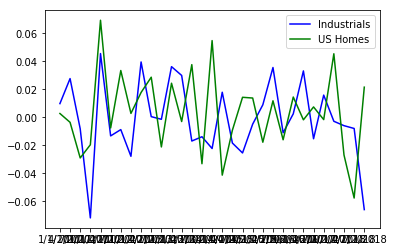

0.1313507260924843

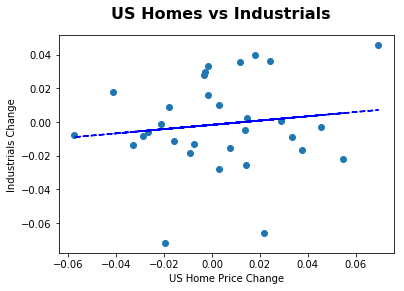

In [27]:
indu = window["Industrials Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

indu, = plt.plot(dates, indu, color="blue", label="Industrials" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[indu, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Industrials Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Industrials", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Industrials Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Industrials Change"].corr(window["RE Change"])

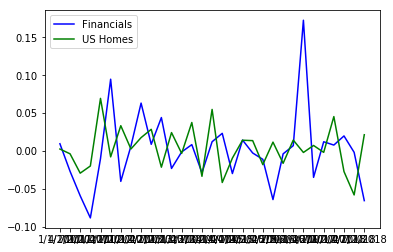

-0.009267067323207609

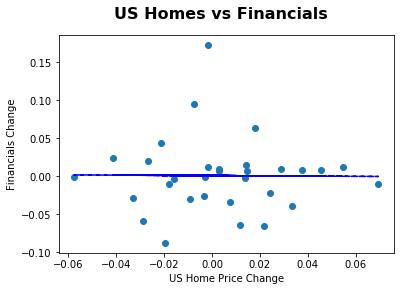

In [28]:
fin = window["Financials Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

fin, = plt.plot(dates, fin, color="blue", label="Financials" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[fin, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Financials Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Financials", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Financials Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Financials Change"].corr(window["RE Change"])

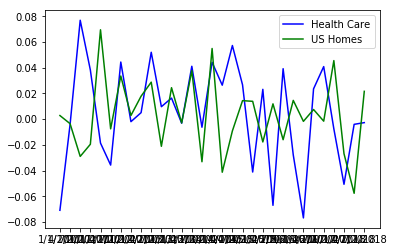

0.0042058776319941595

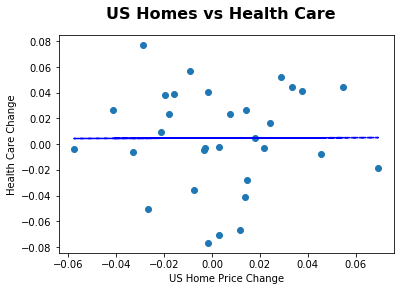

In [29]:
hcare = window["Health Care Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

hcare, = plt.plot(dates, hcare, color="blue", label="Health Care" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[hcare, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Health Care Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Health Care", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Health Care Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Health Care Change"].corr(window["RE Change"])

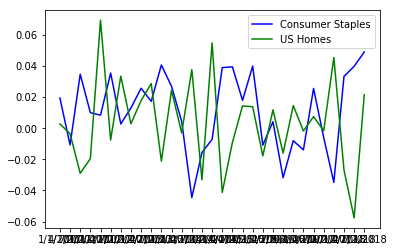

-0.31761162406396487

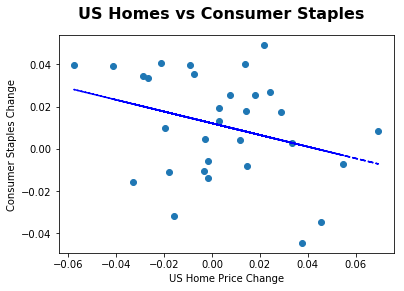

In [30]:
constaples = window["Consumer Staples Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

constaples, = plt.plot(dates, constaples, color="blue", label="Consumer Staples" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[constaples, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Consumer Staples Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Consumer Staples", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Consumer Staples Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Consumer Staples Change"].corr(window["RE Change"])